# 第4章 变形

In [44]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/table.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


## 一、透视表
### 1. pivot
#### 一般状态下，数据在DataFrame会以压缩（stacked）状态存放，例如上面的Gender，两个类别被叠在一列中，pivot函数可将某一列作为新的cols：

![](./picture/fnvofi8g0c\(1\).jpeg)

In [3]:
# 有一点像哑变量的感觉
df.pivot(index='ID', columns='Gender', values='Height').head()

Gender,F,M
ID,,
1101,NaN,173.0
1102,192.0,NaN
1103,NaN,186.0
1104,167.0,NaN
1105,159.0,NaN


In [14]:
pd.pivot_table(df, index="Gender", columns="Address", values="Math")

Address,street_1,street_2,street_4,street_5,street_6,street_7
Gender,,,,,,
F,87.7,56.475,73.533333,55.900000,64.36,73.266667
M,40.6,86.200,48.180000,56.266667,58.80,60.566667


In [17]:
df.groupby(["Gender", "Address"])["Math"].mean()

Gender  Address 
F       street_1    87.700000
        street_2    56.475000
        street_4    73.533333
        street_5    55.900000
        street_6    64.360000
        street_7    73.266667
M       street_1    40.600000
        street_2    86.200000
        street_4    48.180000
        street_5    56.266667
        street_6    58.800000
        street_7    60.566667
Name: Math, dtype: float64

In [12]:
df.pivot(index="ID", columns="Address", values="Weight")

Address,street_1,street_2,street_4,street_5,street_6,street_7
ID,,,,,,
1101,63.0,NaN,NaN,NaN,NaN,NaN
1102,NaN,73.0,NaN,NaN,NaN,NaN
1103,NaN,82.0,NaN,NaN,NaN,NaN
1104,NaN,81.0,NaN,NaN,NaN,NaN
1105,NaN,NaN,64.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2401,NaN,62.0,NaN,NaN,NaN,NaN
2402,NaN,NaN,NaN,NaN,NaN,82.0
2403,NaN,NaN,NaN,NaN,60.0,NaN


In [7]:
df.pivot(index="ID", columns="Address", values="Physics").head()

Address,street_1,street_2,street_4,street_5,street_6,street_7
ID,,,,,,
1101,A+,NaN,NaN,NaN,NaN,NaN
1102,NaN,B+,NaN,NaN,NaN,NaN
1103,NaN,B+,NaN,NaN,NaN,NaN
1104,NaN,B-,NaN,NaN,NaN,NaN
1105,NaN,NaN,B+,NaN,NaN,NaN


In [5]:
# 不同性别在不同街道下的的均值
pd.pivot_table(df, values=["Height", "Weight"],
               index="Gender", columns="Address", margins=True)

Height                                                     \
Address    street_1 street_2 street_4    street_5    street_6 street_7   
Gender                                                                   
F        175.000000   177.75   164.00  169.333333  168.600000    189.0   
M        174.000000   190.50   166.00  184.000000  160.000000    176.0   
All      174.333333   182.00   165.25  176.666667  167.166667    182.5   

                        Weight                                            \
Address         All   street_1   street_2   street_4   street_5 street_6   
Gender                                                                     
F        173.473684  57.000000  75.000000  78.666667  76.333333     63.8   
M        174.937500  68.500000  76.000000  74.800000  85.333333     53.0   
All      174.142857  64.666667  75.333333  76.250000  80.833333     62.0   

                               
Address   street_7        All  
Gender                         
F        84.000000  73.315789  
M        82.666667  76.250000  
All      83.333333  74.657143

In [5]:
df.columns

Index(['School', 'Class', 'ID', 'Gender', 'Address', 'Height', 'Weight',
       'Math', 'Physics'],
      dtype='object')

In [6]:
df.groupby(["Gender", "Address"])["Height"].mean().to_frame().T

Gender         F                                                        M  \
Address street_1 street_2 street_4    street_5 street_6 street_7 street_1   
Height     175.0   177.75    164.0  169.333333    168.6    189.0    174.0   

Gender                                                
Address street_2 street_4 street_5 street_6 street_7  
Height     190.5    166.0    184.0    160.0    176.0

#### 然而pivot函数具有很强的局限性，除了功能上较少之外，还不允许values中出现重复的行列索引对（pair），例如下面的语句就会报错：

In [7]:
# df.pivot(index='School',columns='Gender',values='Height').head()　　＃school索引

#### 因此，更多的时候会选择使用强大的pivot_table函数
### 2. pivot_table
#### 首先，再现上面的操作：

In [8]:
# 有点像one_hot编码,
pd.pivot_table(df, index="ID", columns="Address",
               values="Weight", fill_value=-1).head()

Address,street_1,street_2,street_4,street_5,street_6,street_7
ID,,,,,,
1101,63,-1,-1,-1,-1,-1
1102,-1,73,-1,-1,-1,-1
1103,-1,82,-1,-1,-1,-1
1104,-1,81,-1,-1,-1,-1
1105,-1,-1,64,-1,-1,-1


In [9]:
#  此映射表无实际的意义
pd.pivot_table(df, index='ID', columns='Gender', values='Height').head()

Gender,F,M
ID,,
1101,NaN,173.0
1102,192.0,NaN
1103,NaN,186.0
1104,167.0,NaN
1105,159.0,NaN


In [30]:
df = pd.DataFrame({'Name': ['San Zhang', 'San Zhang', 'San Zhang', 'San Zhang', 'Si Li', 'Si Li', 'Si Li', 'Si Li'], 'Subject': [
                  'Chinese', 'Chinese', 'Math', 'Math', 'Chinese', 'Chinese', 'Math', 'Math'], 'Grade': [80, 90, 100, 90, 70, 80, 85, 95]})
df

,Name,Subject,Grade
0,San Zhang,Chinese,80
1,San Zhang,Chinese,90
2,San Zhang,Math,100
3,San Zhang,Math,90
4,Si Li,Chinese,70
5,Si Li,Chinese,80
6,Si Li,Math,85
7,Si Li,Math,95


In [37]:
pd.pivot_table(df, index="Name", columns="Subject",
               values="Grade", margins=True)

Subject,Chinese,Math,All
Name,,,
San Zhang,85,95.0,90.00
Si Li,75,90.0,82.50
All,80,92.5,86.25


In [27]:
# 不同性别住在不同街道的人数统计
import matplotlib.pyplot as plt
df1 = pd.pivot_table(df, index="Gender", columns="Address",
                     values="Weight", fill_value=1, margins=True, aggfunc="count")

In [28]:
df1

Address,street_1,street_2,street_4,street_5,street_6,street_7,All
Gender,,,,,,,
F,1,4,3,3,5,3,19
M,2,2,5,3,1,3,16
All,3,6,8,6,6,6,35


In [52]:
# 统计不同性别在在各个街道的体重情况
df2 = pd.pivot_table(df, index="Gender", columns="Address",
                     values="Math", aggfunc="count")

<AxesSubplot:xlabel='Gender'>

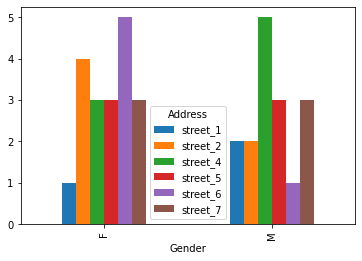

In [64]:
# idenx 作为x轴，columns作为y轴
df2.plot(kind="bar")

In [63]:
# 默认求平均
s1 = df.groupby(["Gender", "Address"])["Weight"].count()
s1.to_frame().T

Gender         F                                                     M  \
Address street_1 street_2 street_4 street_5 street_6 street_7 street_1   
Weight         1        4        3        3        5        3        2   

Gender                                                
Address street_2 street_4 street_5 street_6 street_7  
Weight         2        5        3        1        3

#### 由于功能更多，速度上自然是比不上原来的pivot函数：

In [12]:
%timeit df.pivot(index='ID',columns='Gender',values='Height')
%timeit pd.pivot_table(df,index='ID',columns='Gender',values='Height')

1.68 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.17 ms ± 681 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Pandas中提供了各种选项，下面介绍常用参数：
#### ① aggfunc：对组内进行聚合统计，可传入各类函数，默认为'mean'

In [13]:
# 统计在不同学校中的男女生的数学平均成绩(默认aggfun为平均成绩)
pd.pivot_table(df, index="School", columns="Gender",
               values="Math", margins=True)

Gender,F,M,All
School,,,
S_1,64.100000,63.342857,63.746667
S_2,66.427273,51.155556,59.555000
All,65.447368,56.487500,61.351429


In [14]:
#  groupby 变形
df.groupby(["School", "Gender"])["Math"].agg(["mean"])

mean
School Gender           
S_1    F       64.100000
       M       63.342857
S_2    F       66.427273
       M       51.155556

In [65]:
# 统计不同学校中男女生数学乘积的均值
pd.pivot_table(df, index='School', columns='Gender',
               values='Math', aggfunc=['mean', 'sum']).head()

mean               sum       
Gender          F          M      F      M
School                                    
S_1     64.100000  63.342857  512.8  443.4
S_2     66.427273  51.155556  730.7  460.4

In [16]:
pd.pivot_table(df, index="School", columns="Gender", values="Math",
               aggfunc=["mean", "count", "std"], margins=True)  # 边际统计

mean                       count                std             \
Gender          F          M        All     F   M All          F          M   
School                                                                        
S_1     64.100000  63.342857  63.746667     8   7  15  21.355494  26.650319   
S_2     66.427273  51.155556  59.555000    11   9  20  15.413571  17.131996   
All     65.447368  56.487500  61.351429    19  16  35  17.627736  21.900255   

                   
Gender        All  
School             
S_1     23.077474  
S_2     17.589305  
All     19.915164

#### ② margins：汇总边际状态

In [35]:
pd.pivot_table(df, index='School', columns='Gender',
               values='Height', aggfunc=['mean', 'sum'], margins=True).head()
# margins_name可以设置名字，默认为'All'

mean                           sum            
Gender           F           M         All     F     M   All
School                                                      
S_1     173.125000  178.714286  175.733333  1385  1251  2636
S_2     173.727273  172.000000  172.950000  1911  1548  3459
All     173.473684  174.937500  174.142857  3296  2799  6095

#### ③ 行、列、值都可以为多级

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
mean_Height = df.pivot_table(values="Height", index="Gender")
mean_Height.T

Gender,F,M
Height,173.473684,174.9375


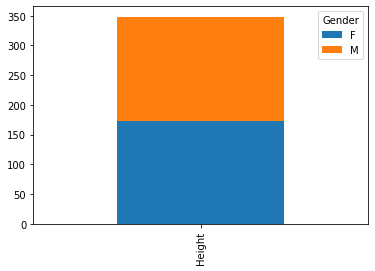

In [37]:
mean_Height.T.plot(kind="bar", stacked=True)
plt.show()

In [38]:
pd.pivot_table(df, index=['School', 'Class'],
               columns=['Gender', 'Address'],
               values=['Height', 'Weight'])

Height                                                        \
Gender              F                                                     M   
Address      street_1 street_2 street_4 street_5 street_6 street_7 street_1   
School Class                                                                  
S_1    C_1        NaN    179.5    159.0      NaN      NaN      NaN    173.0   
       C_2        NaN      NaN    176.0    162.0    167.0      NaN      NaN   
       C_3      175.0      NaN      NaN    187.0      NaN      NaN      NaN   
S_2    C_1        NaN      NaN      NaN    159.0    161.0      NaN      NaN   
       C_2        NaN      NaN      NaN      NaN      NaN    188.5    175.0   
       C_3        NaN      NaN    157.0      NaN    164.0    190.0      NaN   
       C_4        NaN    176.0      NaN      NaN    175.5      NaN      NaN   

                                         ...   Weight                    \
Gender                                   ...        F                     
Address      street_2 street_4 street_5  ... street_4 street_5 street_6   
School Class                             ...                              
S_1    C_1      186.0      NaN      NaN  ...     64.0      NaN      NaN   
       C_2        NaN      NaN    188.0  ...     94.0     63.0     63.0   
       C_3      195.0    161.0      NaN  ...      NaN     69.0      NaN   
S_2    C_1        NaN    163.5      NaN  ...      NaN     97.0     61.0   
       C_2        NaN    155.0    193.0  ...      NaN      NaN      NaN   
       C_3        NaN    187.0    171.0  ...     78.0      NaN     81.0   
       C_4        NaN      NaN      NaN  ...      NaN      NaN     57.0   

                                                                             
Gender                       M                                               
Address      street_7 street_1 street_2 street_4 street_5 street_6 street_7  
School Class                                                                 
S_1    C_1        NaN     63.0     82.0      NaN      NaN      NaN      NaN  
       C_2        NaN      NaN      NaN      NaN     68.0     53.0      NaN  
       C_3        NaN      NaN     70.0     68.0      NaN      NaN     82.0  
S_2    C_1        NaN      NaN      NaN     71.0      NaN      NaN     84.0  
       C_2       76.5     74.0      NaN     91.0    100.0      NaN      NaN  
       C_3       99.0      NaN      NaN     73.0     88.0      NaN      NaN  
       C_4        NaN      NaN      NaN      NaN      NaN      NaN     82.0  

[7 rows x 24 columns]

### 3. crosstab（交叉表）
#### 交叉表是一种特殊的透视表，典型的用途如分组统计，如现在想要统计关于街道和性别分组的频数，
交叉表：交叉表用于计算一列数据对于另外一列数据的分组个数(寻找两个列之间的关系)：

In [66]:
pd.crosstab(index=df['Address'], columns=df['Gender'])

Gender,F,M
Address,,
street_1,1,2
street_2,4,2
street_4,3,5
street_5,3,3
street_6,5,1
street_7,3,3


#### 交叉表的功能也很强大（但目前还不支持多级分组），下面说明一些重要参数：
#### ① values和aggfunc：分组对某些数据进行聚合操作，这两个参数必须成对出现

In [67]:
pd.crosstab(index=df['Address'], columns=df['Gender'],
            values=np.random.randint(1, 20, df.shape[0]), aggfunc='min')
# 默认参数等于如下方法：
# pd.crosstab(index=df['Address'],columns=df['Gender'],values=1,aggfunc='count')

Gender,F,M
Address,,
street_1,19,4
street_2,10,14
street_4,12,5
street_5,7,6
street_6,3,19
street_7,12,2


In [68]:
np.random.randint(1, 20, df.shape[0])

array([11, 13, 17,  5, 16,  9,  5,  9,  2, 13, 10, 11,  4, 15, 13,  3, 17,
        6,  1,  7, 19, 10, 16, 10,  6,  3,  3,  5,  2,  7, 14,  5,  4, 19,
        2])

In [69]:
# 进行1填补一列之后进行数据汇总
pd.crosstab(index=df['Address'], columns=df['Gender'],
            values=1, aggfunc='count')

Gender,F,M
Address,,
street_1,1,2
street_2,4,2
street_4,3,5
street_5,3,3
street_6,5,1
street_7,3,3


#### ② 除了边际参数margins外，还引入了normalize参数，可选'all','index','columns'参数值

In [42]:
pd.crosstab(index=df['Address'], columns=df['Gender'],
            normalize='all', margins=True)

Gender,F,M,All
Address,,,
street_1,0.028571,0.057143,0.085714
street_2,0.114286,0.057143,0.171429
street_4,0.085714,0.142857,0.228571
street_5,0.085714,0.085714,0.171429
street_6,0.142857,0.028571,0.171429
street_7,0.085714,0.085714,0.171429
All,0.542857,0.457143,1.000000


## 二、其他变形方法
### 1. melt
#### melt函数可以认为是pivot函数的逆操作，将unstacked状态的数据，压缩成stacked，使“宽”的DataFrame变“窄”

In [43]:
df_m = df[['ID', 'Gender', 'Math']]
df_m.head()

,ID,Gender,Math
0,1101,M,34.0
1,1102,F,32.5
2,1103,M,87.2
3,1104,F,80.4
4,1105,F,84.8


In [44]:
df.pivot(index='ID', columns='Gender', values='Math').head()

Gender,F,M
ID,,
1101,NaN,34.0
1102,32.5,NaN
1103,NaN,87.2
1104,80.4,NaN
1105,84.8,NaN


#### melt函数中的id_vars表示需要保留的列，value_vars表示需要stack的一组列

In [45]:
pivoted = df.pivot(index='ID', columns='Gender', values='Math')
result = pivoted.reset_index().melt(id_vars=['ID'], value_vars=['F', 'M'], value_name='Math')\
    .dropna().set_index('ID').sort_index()
# 检验是否与展开前的df相同，可以分别将这些链式方法的中间步骤展开，看看是什么结果
result.equals(df_m.set_index('ID'))

True

In [46]:
pivoted.reset_index().melt(id_vars=["ID"], value_vars=[
    "F", "M"], value_name="Math")

,ID,Gender,Math
0,1101,F,NaN
1,1102,F,32.5
2,1103,F,NaN
3,1104,F,80.4
4,1105,F,84.8
...,...,...,...
65,2401,M,NaN
66,2402,M,48.7
67,2403,M,NaN
68,2404,M,NaN


### 2. 压缩与展开
#### （1）stack：这是最基础的变形函数，总共只有两个参数：level和dropna

In [87]:
df_s = pd.pivot_table(df, index=['Class', 'ID'],
                      columns='Gender', values=['Height', 'Weight'])
df_s

Height        Weight       
Gender          F      M      F      M
Class ID                              
C_1   1101    NaN  173.0    NaN   63.0
      1102  192.0    NaN   73.0    NaN
      1103    NaN  186.0    NaN   82.0
      1104  167.0    NaN   81.0    NaN
      1105  159.0    NaN   64.0    NaN
      2101    NaN  174.0    NaN   84.0
      2102  161.0    NaN   61.0    NaN
      2103    NaN  157.0    NaN   61.0
      2104  159.0    NaN   97.0    NaN
      2105    NaN  170.0    NaN   81.0
C_2   1201    NaN  188.0    NaN   68.0
      1202  176.0    NaN   94.0    NaN
      1203    NaN  160.0    NaN   53.0
      1204  162.0    NaN   63.0    NaN
      1205  167.0    NaN   63.0    NaN
      2201    NaN  193.0    NaN  100.0
      2202  194.0    NaN   77.0    NaN
      2203    NaN  155.0    NaN   91.0
      2204    NaN  175.0    NaN   74.0
      2205  183.0    NaN   76.0    NaN
C_3   1301    NaN  161.0    NaN   68.0
      1302  175.0    NaN   57.0    NaN
      1303    NaN  188.0    NaN   82.0
      1304    NaN  195.0    NaN   70.0
      1305  187.0    NaN   69.0    NaN
      2301  157.0    NaN   78.0    NaN
      2302    NaN  171.0    NaN   88.0
      2303  190.0    NaN   99.0    NaN
      2304  164.0    NaN   81.0    NaN
      2305    NaN  187.0    NaN   73.0
C_4   2401  192.0    NaN   62.0    NaN
      2402    NaN  166.0    NaN   82.0
      2403  158.0    NaN   60.0    NaN
      2404  160.0    NaN   84.0    NaN
      2405  193.0    NaN   54.0    NaN

In [99]:
df_s.groupby('Class').head(2)

Height        Weight      
Gender          F      M      F     M
Class ID                             
C_1   1101    NaN  173.0    NaN  63.0
      1102  192.0    NaN   73.0   NaN
C_2   1201    NaN  188.0    NaN  68.0
      1202  176.0    NaN   94.0   NaN
C_3   1301    NaN  161.0    NaN  68.0
      1302  175.0    NaN   57.0   NaN
C_4   2401  192.0    NaN   62.0   NaN
      2402    NaN  166.0    NaN  82.0

In [100]:
df_stacked = df_s.stack()
df_stacked.head()

Height  Weight
Class ID   Gender                
C_1   1101 M        173.0    63.0
      1102 F        192.0    73.0
      1103 M        186.0    82.0
      1104 F        167.0    81.0
      1105 F        159.0    64.0

In [101]:
df_stacked.groupby('Class').head(2)

Height  Weight
Class ID   Gender                
C_1   1101 M        173.0    63.0
      1102 F        192.0    73.0
C_2   1201 M        188.0    68.0
      1202 F        176.0    94.0
C_3   1301 M        161.0    68.0
      1302 F        175.0    57.0
C_4   2401 F        192.0    62.0
      2402 M        166.0    82.0

#### stack函数可以看做将横向的索引放到纵向，因此功能类似与melt，参数level可指定变化的列索引是哪一层（或哪几层，需要列表）

In [91]:
df_stacked = df_s.stack(0)
df_stacked.groupby('Class').head(2)

Gender                 F      M
Class ID                       
C_1   1101 Height    NaN  173.0
           Weight    NaN   63.0
C_2   1201 Height    NaN  188.0
           Weight    NaN   68.0
C_3   1301 Height    NaN  161.0
           Weight    NaN   68.0
C_4   2401 Height  192.0    NaN
           Weight   62.0    NaN

#### (2) unstack：stack的逆函数，功能上类似于pivot_table

In [102]:
df_stacked.head()

Height  Weight
Class ID   Gender                
C_1   1101 M        173.0    63.0
      1102 F        192.0    73.0
      1103 M        186.0    82.0
      1104 F        167.0    81.0
      1105 F        159.0    64.0

In [107]:
df_stacked.unstack(level=2)

Height        Weight       
Gender          F      M      F      M
Class ID                              
C_1   1101    NaN  173.0    NaN   63.0
      1102  192.0    NaN   73.0    NaN
      1103    NaN  186.0    NaN   82.0
      1104  167.0    NaN   81.0    NaN
      1105  159.0    NaN   64.0    NaN
      2101    NaN  174.0    NaN   84.0
      2102  161.0    NaN   61.0    NaN
      2103    NaN  157.0    NaN   61.0
      2104  159.0    NaN   97.0    NaN
      2105    NaN  170.0    NaN   81.0
C_2   1201    NaN  188.0    NaN   68.0
      1202  176.0    NaN   94.0    NaN
      1203    NaN  160.0    NaN   53.0
      1204  162.0    NaN   63.0    NaN
      1205  167.0    NaN   63.0    NaN
      2201    NaN  193.0    NaN  100.0
      2202  194.0    NaN   77.0    NaN
      2203    NaN  155.0    NaN   91.0
      2204    NaN  175.0    NaN   74.0
      2205  183.0    NaN   76.0    NaN
C_3   1301    NaN  161.0    NaN   68.0
      1302  175.0    NaN   57.0    NaN
      1303    NaN  188.0    NaN   82.0
      1304    NaN  195.0    NaN   70.0
      1305  187.0    NaN   69.0    NaN
      2301  157.0    NaN   78.0    NaN
      2302    NaN  171.0    NaN   88.0
      2303  190.0    NaN   99.0    NaN
      2304  164.0    NaN   81.0    NaN
      2305    NaN  187.0    NaN   73.0
C_4   2401  192.0    NaN   62.0    NaN
      2402    NaN  166.0    NaN   82.0
      2403  158.0    NaN   60.0    NaN
      2404  160.0    NaN   84.0    NaN
      2405  193.0    NaN   54.0    NaN

In [108]:
result = df_stacked.unstack().swaplevel(1, 0, axis=1).sort_index(axis=1)
result.equals(df_s)
# 同样在unstack中可以指定level参数

False

## 三、哑变量与因子化
### 1. Dummy Variable（哑变量）(OneHot编码)
#### 这里主要介绍get_dummies函数，其功能主要是进行one-hot编码：

In [78]:
s = pd.Series(list('abca'))

In [80]:
pd.get_dummies(s, prefix="onehot", prefix_sep= "-")

,onehot-a,onehot-b,onehot-c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [81]:
df_d = df[['Class', 'Gender', 'Weight']]
df_d.head()

,Class,Gender,Weight
0,C_1,M,63
1,C_1,F,73
2,C_1,M,82
3,C_1,F,81
4,C_1,F,64


#### 现在希望将上面的表格前两列转化为哑变量，并加入第三列Weight数值：

In [53]:
pd.get_dummies(df_d[['Class', 'Gender']]).join(df_d['Weight']).head()
# 可选prefix参数添加前缀，prefix_sep添加分隔符

,Class_C_1,Class_C_2,Class_C_3,Class_C_4,Gender_F,Gender_M,Weight
0,1,0,0,0,0,1,63
1,1,0,0,0,1,0,73
2,1,0,0,0,0,1,82
3,1,0,0,0,1,0,81
4,1,0,0,0,1,0,64


In [82]:
A = pd.get_dummies(df.Class, prefix="Class")
A.head()

,Class_C_1,Class_C_2,Class_C_3,Class_C_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [83]:
B = pd.get_dummies(df.Gender, prefix="Gender")
B.head()

,Gender_F,Gender_M
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [84]:
All_table = A.join(B).join(df.Weight)
All_table.head()

,Class_C_1,Class_C_2,Class_C_3,Class_C_4,Gender_F,Gender_M,Weight
0,1,0,0,0,0,1,63
1,1,0,0,0,1,0,73
2,1,0,0,0,0,1,82
3,1,0,0,0,1,0,81
4,1,0,0,0,1,0,64


### 2. factorize方法（类别编码）
#### 该方法主要用于自然数编码，并且缺失值会被记做-1，其中sort参数表示是否排序后赋值

In [57]:
codes, uniques = pd.factorize(['b', None, 'a', 'c', 'b'], sort=True)
display(codes)
display(uniques)

array([ 1, -1,  0,  2,  1])

array(['a', 'b', 'c'], dtype=object)

## 四、问题与练习

### 1. 问题
#### 【问题一】 上面提到了许多变形函数，如melt/crosstab/pivot/pivot_table/stack/unstack函数，请总结它们各自的使用特点。

#### 【问题二】 变形函数和多级索引是什么关系？哪些变形函数会使得索引维数变化？具体如何变化？
#### 【问题三】 请举出一个除了上文提过的关于哑变量方法的例子。
#### 【问题四】 使用完stack后立即使用unstack一定能保证变化结果与原始表完全一致吗？
#### 【问题五】 透视表中涉及了三个函数，请分别使用它们完成相同的目标（任务自定）并比较哪个速度最快。
#### 【问题六】 既然melt起到了stack的功能，为什么再设计stack函数？

### 2. 练习
#### 【练习一】 继续使用上一章的药物数据集：

In [ ]:
pd.read_csv('data/Drugs.csv').head()

#### (a) 现在请你将数据表转化成如下形态，每行需要显示每种药物在每个地区的10年至17年的变化情况，且前三列需要排序：
![avatar](picture/drug_pic.png)
#### (b) 现在请将(a)中的结果恢复到原数据表，并通过equal函数检验初始表与新的结果是否一致（返回True）

#### 【练习二】 现有一份关于某地区地震情况的数据集，请解决如下问题：

In [ ]:
pd.read_csv('data/Earthquake.csv').head()

#### (a) 现在请你将数据表转化成如下形态，将方向列展开，并将距离、深度和烈度三个属性压缩：
![avatar](picture/earthquake_pic.png)
#### (b) 现在请将(a)中的结果恢复到原数据表，并通过equal函数检验初始表与新的结果是否一致（返回True）

### 参考

[玩转Pandas透视表](https://cloud.tencent.com/developer/article/1492169)